## Binning data with Pandas qcut and cut

- References:
    - [pandas.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)
    - [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
    
- Binning data
    - The concept of binning data can be best illustrated by Histogram that put data into equal-distance buckets (or bins)
    - Any data series can be binned either by equal distance (i.e. each bin has same distance) or by equal size (i.e. each bin has same number of samples)
    - In Pandas, there are 2 functions help with the binning data task, and they are `qcut` and `cut`
        - `qcut`: bins data into equal size bins, namely, each bin has same number of samples
        - `cut`: bins data into equal distinace bins, namely, the distance in each bins is the same but number of samples in each bin may be different.
        
- Examples: the following script demostrates how to use qcut, cut, and combine these 2 functions with `rolling`
    - create equal size bins with `qcut` and plot bins in bar chart
    - create equal size bins with `qcut`, assign labels to each bin,  and plot bins in bar chart  
    - create equal-distance bins with `cut` and plot the bins (with bar chart)
    - create qual-distance bins with `cut` and `rolling` and plot the bins (with bar chart)
    - create equal-distance bins with `cut` and `rolling`, calculate the mean,  and plot the bins (with bar chart)
    - create 5 equal-distance bins on rolling normalized data with rolling `cut` and plot the bins (with bar chart)

### Load libraries and download data

In [1]:
import pandas as pd
import numpy as np
import os
import gc
import copy
from pathlib import Path
from datetime import datetime, timedelta, time, date

In [2]:
#this package is to download equity price data from yahoo finance
#the source code of this package can be found here: https://github.com/ranaroussi/yfinance/blob/main
import yfinance as yf

c:\python37\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
df = yf.Ticker('GSK').history(period="max", start='2000-01-01')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-12-31,19.986372,20.053291,19.897147,19.941759,136724,0.0,0.0
2000-01-03,19.964064,20.097900,19.629470,19.830227,545423,0.0,0.0
2000-01-04,19.830232,19.830232,19.272575,19.317188,360150,0.0,0.0
2000-01-05,19.584855,19.964060,19.451017,19.964060,472451,0.0,0.0
2000-01-06,19.763303,19.807915,19.272565,19.674078,837407,0.0,0.0


### Histogram

<AxesSubplot:>

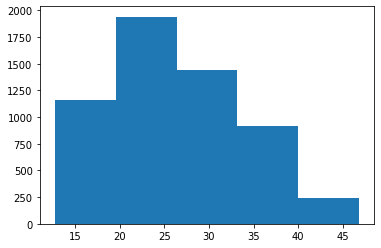

In [5]:
df['Close'].hist(bins=5, figsize=(6, 4), grid=False)

### Create equal-sized bins (same number of samples in each bin) with `qcut`

#### create 5 equal-size bins and plot the bins (with bar chart)

In [6]:
#create 10 equal-size bins
df['qcut'] = pd.qcut(df['Close'], q=5)
df['qcut']

Date
1999-12-31    (19.489, 22.421]
2000-01-03    (19.489, 22.421]
2000-01-04    (12.705, 19.489]
2000-01-05    (19.489, 22.421]
2000-01-06    (19.489, 22.421]
                    ...       
2022-08-17     (33.281, 46.85]
2022-08-18     (33.281, 46.85]
2022-08-19     (33.281, 46.85]
2022-08-22     (33.281, 46.85]
2022-08-23     (33.281, 46.85]
Name: qcut, Length: 5698, dtype: category
Categories (5, interval[float64, right]): [(12.705, 19.489] < (19.489, 22.421] < (22.421, 28.357] < (28.357, 33.281] < (33.281, 46.85]]

In [7]:
df['qcut'].value_counts()

(12.705, 19.489]    1140
(22.421, 28.357]    1140
(33.281, 46.85]     1140
(19.489, 22.421]    1139
(28.357, 33.281]    1139
Name: qcut, dtype: int64

<AxesSubplot:>

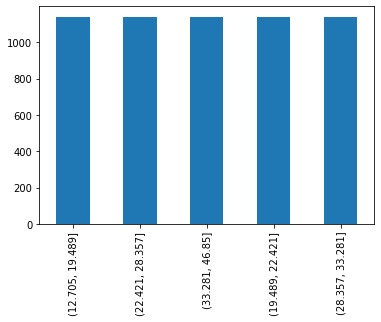

In [8]:
df['qcut'].value_counts().plot(kind='bar', figsize=(6, 4), grid=False)

#### create 5 equal-size bins, assign label to each bin and plot the bins (with bar chart)

In [9]:
#create 10 equal-size bins
df['qcut'] = pd.qcut(df['Close'], q=5, labels = [f'bin{i+1}' for i in range(5)])
df['qcut']

Date
1999-12-31    bin2
2000-01-03    bin2
2000-01-04    bin1
2000-01-05    bin2
2000-01-06    bin2
              ... 
2022-08-17    bin5
2022-08-18    bin5
2022-08-19    bin5
2022-08-22    bin5
2022-08-23    bin5
Name: qcut, Length: 5698, dtype: category
Categories (5, object): ['bin1' < 'bin2' < 'bin3' < 'bin4' < 'bin5']

In [10]:
df['qcut'].value_counts().sort_index()

bin1    1140
bin2    1139
bin3    1140
bin4    1139
bin5    1140
Name: qcut, dtype: int64

<AxesSubplot:>

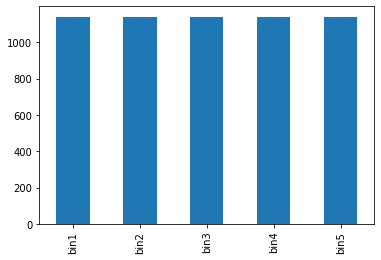

In [11]:
df['qcut'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4), grid=False)

### Create equal-distance bins (same distant but different number of samples in each bin) with `cut`

#### create 5 equal-distance bins and plot the bins (with bar chart)

In [12]:
df['cut'] = pd.cut(df['Close'], bins=5, labels = [f'range{i+1}' for i in range(5)])
df['cut']

Date
1999-12-31    range2
2000-01-03    range2
2000-01-04    range1
2000-01-05    range2
2000-01-06    range2
               ...  
2022-08-17    range4
2022-08-18    range4
2022-08-19    range4
2022-08-22    range4
2022-08-23    range4
Name: cut, Length: 5698, dtype: category
Categories (5, object): ['range1' < 'range2' < 'range3' < 'range4' < 'range5']

<AxesSubplot:>

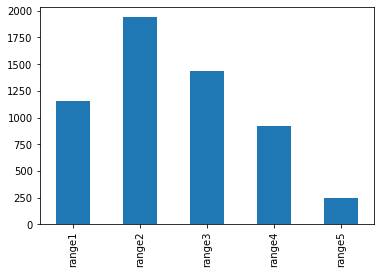

In [13]:
df['cut'].value_counts().sort_index().plot(kind='bar')

#### create 5 equal-distance bins with rolling and plot the bins (with bar chart)

In [14]:
df['roll_cut'] = df['Close'].rolling(100, 100).apply(lambda x: pd.cut(x, bins=5, labels = [i+1 for i in range(5)])[-1])

<AxesSubplot:>

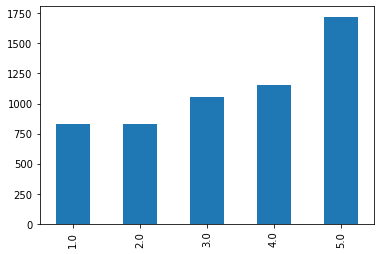

In [15]:
df['roll_cut'].value_counts().sort_index().plot(kind='bar')

#### create 5 equal-distance bins with rolling, calculate the mean,  and plot the bins (with bar chart)

In [16]:
df['roll_cut_mean'] = df['Close'].rolling(100, 100).apply(lambda x: x[pd.cut(x, bins=5, labels = [i+1 for i in range(5)])==1].mean())

<AxesSubplot:>

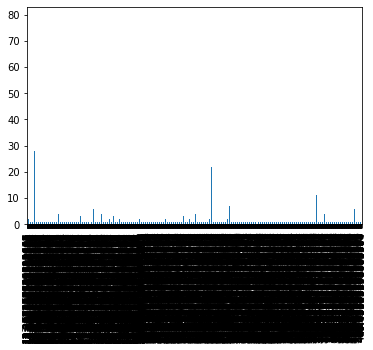

In [17]:
df['roll_cut_mean'].value_counts().sort_index().plot(kind='bar')

#### create 5 equal-distance bins on rolling normalized data with rolling `cut` and plot the bins (with bar chart)

In [18]:
df['roll_norm_close'] = df['Close'].rolling(100, 100).apply(lambda x: (x.mean()-x[-1])/x.std())

<AxesSubplot:xlabel='Date'>

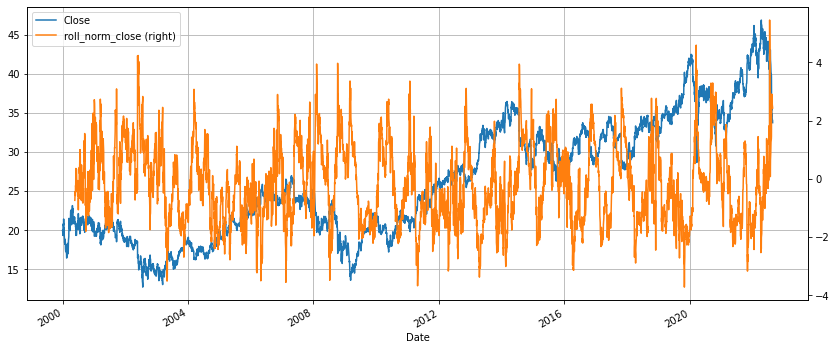

In [19]:
df[['Close', 'roll_norm_close']].plot(figsize=(14, 6), secondary_y = ['roll_norm_close'], grid=True)

In [20]:
df['roll_norm_close_cut'] = df['roll_norm_close'].rolling(100, 100).apply(lambda x: pd.cut(x, bins=5, labels = [i+1 for i in range(5)])[-1])

<AxesSubplot:title={'center':'roll_norm_close_cut'}>

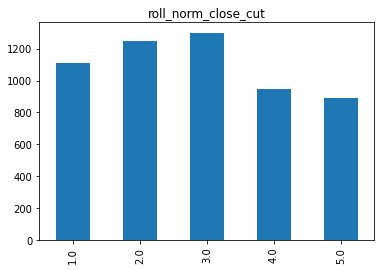

In [21]:
df['roll_norm_close_cut'].value_counts().sort_index().plot(kind='bar', title='roll_norm_close_cut')

<AxesSubplot:title={'center':'Close'}, ylabel='Frequency'>

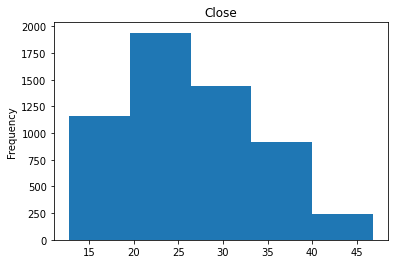

In [22]:
df['Close'].plot(kind='hist', bins=5, title='Close')